<p>
<h1><b><center></center></b></h1>
<center><img src="https://drive.google.com/uc?id=1UJc1ci41G6ahJ7ProKvunUOIBcTXZ6ZG" align="center" width="550"></center>
</p>
<h1><b><center>Mecánica Celeste</center></b></h1>
<h2><b><center>Prof. Jorge I. Zuluaga</center></b></h1>
<h2><b><center>Tarea 2</center></b><h2>
<h3><b><center>Renzdevous en Marte</center></b><h3>
<h5><center><b>Asignada</b>: 27 de agosto de 2024</center><h5>
<h5><center><b>Entrega</b>: 9 de septiembre de 2024</center><h5>

<hr/>
<b>Nombre</b>: Simón Patiño
<br/>
<hr/>

## Enunciado

**Objetivo**: El objetivo de esta tarea es calcular las condiciones completas de una maniobra de *rendezvous* alrededor de Marte, en el que un vehículo tripulado parte de una estación espacial y necesita acoplarse con un segundo vehículo que está estacionado en una órbita diferente.


**Procedimiento**:

**Una estación espacial** se encuentra alrededor de Marte en una órbita circular con semieje mayor $a_1 = 12554.7$ km y orientación dada por los elementos $I_1 = 23.4^\circ$, $\Omega_1 = 123.45^\circ$, $\omega_1 = 256.23^\circ$. Desde allí se quiere lanzar una **sonda con provisiones** que debe acoplarse con un **vehículo tripulado** que se encuentra en una órbitra mayor con elementos $a = 15204.5$ km, $e = 0.55$, $I = 52.97^\circ$, $\Omega = 137.95^\circ$, $\omega = 141.14^\circ$. A este tipo de maniobras se las llama *rendesvous*. Los elementos están calculados respecto al plano del ecuador de Marte que será nuestro *plano de observación*.

1. Si el lanzamiento del vehículo con provisiones debe ocurrir en $t=0$ cuando la estación espacial tiene $M_1= 48.98^\circ$ y el vehículo tripulado $M_2 = 137.55^\circ$ y se desea que llegue en exactamente 200 minutos, determine la posición de la capsula en el momento del lanzamiento de la estación y en el momento de llegada al vehículo tripulado. Grafique en 3 dimensiones, a Marte, las órbitas y la posición de los puntos.

  **Ayuda**: Para incluir en un gráfico una esfera que represente a Marte puede usar la rutina de `pymcel`:
    
  ```python
  pc.dibuja_esfera(ax,centro=(0,0,0),radio=1,color='r',alpha=0.3)
  ```
  donde `ax` es el handler del axis en el que esta haciendo el plot.

2. Usando las posiciones de los puntos de partida y de llegada de la capsula encuentre los ángulos de Euler $I, \Omega, \omega'$ del plano de Lambert sobre el que estará la órbita de transferencia y calcule la matriz de transformación entre el plano de observación y el plano de Lambert.

 **Ayuda**: Para verificar que la matriz está correcta, si transforma la posición de los puntos de partida y de llegada, del sistema de observación al sistema del plano de Lambert, las coordenadas resultantes deben caer sobre el plano ($z=0$) y el punto 1 (punto de partida) debe estar sobre el eje $x$ en el plano de Lambert.

3. Encuentre, usando el método de Lambert, la órbita que permite ir en 200 minutos entre los puntos inicial y final. Exprese su respuesta indicando semieje mayor, excentricidad y argumento del periapsis en el plano de Lambert.  Dibuje la órbita y los puntos en el plano de Lambert para verificar que son los correctos.

4. Calcule la velocidad que debe tener la sonda con provisiones en el punto de partida y la velocidad que debe tener la sonda en el punto de llegada con respecto al plano de Lambert. Usando la matriz de rotación, encuentre las componentes de los vectores de velocidad a la salida y a la llegada.

5. Determine el valor de los $\Delta \vec v$ y sus magnitudes (que llamaremos abusando del lenguaje $\Delta v$) en el punto de partida de la sonda y en el punto de llegada para que la maniobra de *renzdevous* sea exitosa.

**Condiciones**: Resuelva el problema usando únicamente unidades canónicas y solo la respuestas finales expréselas en unidades de km y km/s.

Para el radio y la masa de Marte use:

$$
R_\mathrm{Marte} = 3393.15\;\mathrm{km}\\
M_\mathrm{Marte} = 6.39\times 10^{23}\;\mathrm{kg}\\
$$

- **Atención**: En caso de utilizar ayudas como `ChatGPT` o códigos de `Stack Over Flow` debe citar debidamente la fuente, pero también entender a cabalidad el código, el profesor puede pedir justificación.

## Solución

##*Instalación de librerías*

In [ ]:
!pip install -Uq rebound
!pip install -Uq spiceypy
!pip install -Uq celluloid
!pip install -Uq pymcel
import pymcel as pc
import spiceypy as spy
import rebound as rb
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from matplotlib.patches import Circle
from scipy.optimize import bisect


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 785.3/785.3 kB 11.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 9.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 67.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 910.8/910.8 kB 34.8 MB/s eta 0:00:00
Paquete pymcel cargado. Versión: 0.6.6


##*Implementación de unidades canónicas*


*   La longitud estará dada en $R_{marte}$
*   La masa estará dada en $M_{marte}$

###*Despejemos nuestra unidad de tiempo canónico*



In [ ]:
r_marte = 3393.15e3 #m
m_marte = 6.39e23 #kg
UL = 1*r_marte
UM = 1*m_marte
G = pc.constantes.G
UT = np.sqrt(UL**3/(G*UM))

print("factor de conversion", UT)


factor de conversion 957.086735531627


##*Codigo para dibujar una esfera*

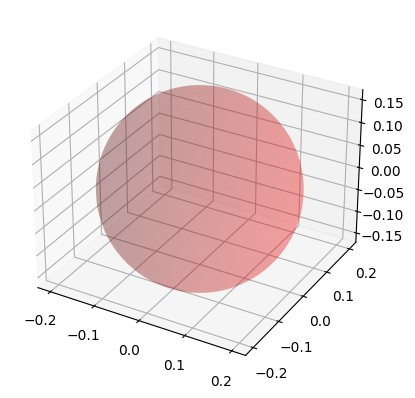

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
pc.dibuja_esfera(ax, centro=(0,0,0), radio=0.2, color='r', alpha=0.2)
ax.axis('equal');

##*Es momento de dibujar las dos órbitas (estación espacial y vehículo). Gracias a los elementos orbitales es posible hallar las coordenadas de cada punto de la órbita en el plano de observación de Marte*
##*Respecto a la posición inicial de la sonda, puede ser hallada con $M_1$ y la posición final puede ser hallada propagando 200 minutos la posición del vehículo espacial, partiendo de $M_2$*

In [ ]:
# Orbit space station
e1 = 0    # Circular orbit
a1= 3.7 #  R_marte

#orbital elements
i1 = np.deg2rad(23.4)
omega1 = np.deg2rad(123.45)
w1 = np.deg2rad(256.23)
p1 = a1*(1-e1**2)

#calculo de los r

rs1 = [p1/(1 + e1*np.cos(f))  for f in np.linspace(0, 2*np.pi, 500)]

xppp1 = [rs1[i]*(np.cos(omega1)*np.cos(w1 + f) - np.cos(i1)*np.sin(omega1)*np.sin(w1 + f)) for i, f in enumerate(np.linspace(0, 2*np.pi, 500 ))]
yppp1 = [rs1[i]*(np.sin(omega1)*np.cos(w1 + f) + np.cos(i1)*np.cos(omega1)*np.sin(w1 + f)) for i, f in enumerate(np.linspace(0, 2*np.pi, 500 ))]
zppp1 = [rs1[i]*(np.cos(f)*np.sin(w1)*np.sin(i1) + np.sin(f)*np.cos(w1)*np.sin(i1)) for i, f in enumerate(np.linspace(0, 2*np.pi, 500 ))]

#Process to find the true anomality (initial position)

Mo1 = np.deg2rad(48.98)
t = 12000/UT #converting 200 minutes to our canonic units
tini = 0
mu = 1
n1 = np.sqrt(mu/a1**3)

M1 = Mo1 + n1*(0-tini) ; M1 = np.mod(M1,2*np.pi)
E1, error, niter = pc.kepler_newton(M1,e1,M1,delta=1e-12) ; E1 = np.mod(E1,2*np.pi)
f1 = 2*np.arctan(np.sqrt((1+e1)/(1-e1))*np.tan(E1/2)) ; f1 = np.mod(f1,2*np.pi)

#polar equation

r1_init = p1/(1 + e1*np.cos(f1))

#Transformation from orbital elements to positions

xinit = r1_init*(np.cos(omega1)*np.cos(w1 + f1) - np.cos(i1)*np.sin(omega1)*np.sin(w1 + f1))
yinit = r1_init*(np.sin(omega1)*np.cos(w1 + f1) + np.cos(i1)*np.cos(omega1)*np.sin(w1 + f1))
zinit = r1_init*(np.cos(f1)*np.sin(w1)*np.sin(i1) + np.sin(f1)*np.cos(w1)*np.sin(i1))

# Orbit vehicle | same process

e2 = 0.55
a2 = 4.4809
i2 = np.deg2rad(52.97)
omega2 = np.deg2rad(137.95)
w2 = np.deg2rad(141.14)
p2 = a2*(1-e2**2)

rs2 = [p2/(1 + e2*np.cos(f))  for f in np.linspace(0, 2*np.pi, 500)]

xppp2 = [rs2[i]*(np.cos(omega2)*np.cos(w2 + f) - np.cos(i2)*np.sin(omega2)*np.sin(w2 + f)) for i, f in enumerate(np.linspace(0, 2*np.pi, 500 ))]
yppp2 = [rs2[i]*(np.sin(omega2)*np.cos(w2 + f) + np.cos(i2)*np.cos(omega2)*np.sin(w2 + f)) for i, f in enumerate(np.linspace(0, 2*np.pi, 500 ))]
zppp2 = [rs2[i]*(np.cos(f)*np.sin(w2)*np.sin(i2) + np.sin(f)*np.cos(w2)*np.sin(i2)) for i, f in enumerate(np.linspace(0, 2*np.pi, 500 ))]

Mo2 = np.deg2rad(137.55)
n2 = np.sqrt(mu/a2**3)

M2 = Mo2 + n2*(t-tini); M2 = np.mod(M2,2*np.pi)
E2, error, niter = pc.kepler_newton(M2,e2,M2,delta=1e-12) ; E2 = np.mod(E2,2*np.pi)
f2 = 2*np.arctan(np.sqrt((1+e2)/(1-e2))*np.tan(E2/2)) ; f2 = np.mod(f2,2*np.pi)

r2_final = p2/(1 + e2*np.cos(f2))

xfinal = r2_final*(np.cos(omega2)*np.cos(w2 + f2) - np.cos(i2)*np.sin(omega2)*np.sin(w2 + f2))
yfinal = r2_final*(np.sin(omega2)*np.cos(w2 + f2) + np.cos(i2)*np.cos(omega2)*np.sin(w2 + f2))
zfinal = r2_final*(np.cos(f2)*np.sin(w2)*np.sin(i2) + np.sin(f2)*np.cos(w2)*np.sin(i2))

print("inital position of the provisions")
print(xinit,yinit,zinit)
print("final position of the provisions")
print(xfinal,yfinal,zfinal)


inital position of the provisions
1.1389846407489743 3.309269617929022 -1.2006034249450706
final position of the provisions
-3.23260863633117 5.416799907296472 -2.461863922792553


##*Ahora dibujemos a Marte, las órbitas de la estación espacial, la del vehículo, la posición inicial y final de la sonda*

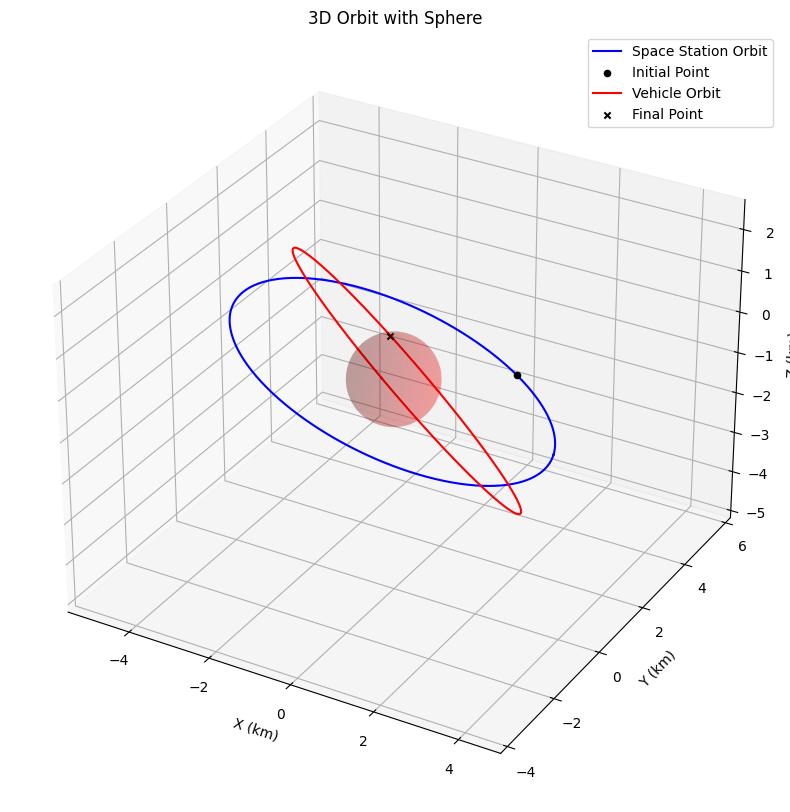

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure( figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
pc.dibuja_esfera(ax, centro=(0,0,0), radio=1, color='r', alpha=0.2)

# Add the orbit points
ax.plot(xppp1, yppp1, zppp1, label='Space Station Orbit', color='b')

ax.scatter(xinit, yinit, zinit, label='Initial Point', color='k')

ax.plot(xppp2, yppp2, zppp2, label='Vehicle Orbit', color='r')

ax.scatter(xfinal, yfinal, zfinal, label='Final Point', color='k', marker = "x")

# Set axis labels
ax.set_xlabel('X (km)')
ax.set_ylabel('Y (km)')
ax.set_zlabel('Z (km)')
ax.set_title('3D Orbit with Sphere')

ax.legend()

ax.axis('equal');

___



##*Ahora migremos nuestro problema al plano de Lambert, donde   $\vec{r1}$ será la posición inicial de la sonda y $\vec{r2}$ será la posición final de la sonda*

In [ ]:
r1 = np.array([xinit, yinit, zinit])
r2 = np.array([xfinal, yfinal, zfinal])
print("r1:", r1)
print("r2:", r2)

r1: [ 1.13898464  3.30926962 -1.20060342]
r2: [-3.23260864  5.41679991 -2.46186392]


##*Ahora hallaremos los ángulos de Euler $(\Omega, I, \omega')$, el procedimiento para hallarlos fue desarrollado tanto en clase como en Sección 3.9.1. Determinación de órbita* en el libro de Mecánica Celeste de Zuluaga.

In [ ]:
hpv = np.cross(r1, r2)  #Primer vector auxiliar
hp = np.linalg.norm(hpv)
ez = np.array([0,0,1])
ex = np.array([1,0,0])
Nv = np.cross(ez, hpv) #Segundo vector auxiliar
N = np.linalg.norm(Nv)

I =  np.arccos(hpv[2]/hp)  #No tiene problema con el rango
Omega =  np.arccos(Nv[0]/N) if Nv[1] >= 0 else 2*np.pi - np.arccos(Nv[0]/N)
Wp = np.arccos(np.dot(r1, Nv)/(np.linalg.norm(r1)*N)) if r1[2] >= 0 else 2*np.pi - np.arccos(np.dot(r1, Nv)/(np.linalg.norm(r1)*N))

print("Ángulos de Euler calculados en grados", "\n" )
print("I:", I*180/np.pi)
print("Omega:", Omega*180/np.pi)
print("Wp:", Wp*180/np.pi)

Ángulos de Euler calculados en grados 

I: 22.202296697756058
Omega: 193.81231291733693
Wp: 239.17201354511127


##*Ahora calculemos la matriz rotacional correspondiente. En el siguiente orden debemos ejecutar las rotaciones: $\Omega , I, \omega'$*

In [ ]:
M = spy.eul2m(Wp,I,Omega,3,1,3)

print("Matriz de rotación M:")
print(M)


Matriz de rotación M:
[[ 0.30783369  0.89439719 -0.32448741]
 [-0.94715342  0.25573574 -0.1936482 ]
 [-0.09021538  0.3669508   0.92585544]]


##*Finalmente, con esta matriz, es fácil pasar del sistema de referencia del observador al plano de Lambert o viceversa (con la matriz transpuesta).*

##*Note que por definición, $P1$ debe estar sobre el eje $x$ y ambos puntos deben tener componente $z = 0$*

In [ ]:
P1 = np.array(spy.mxv(M,r1))
P2 = np.array(spy.mxv(M,r2))

print("P1:", [f"{x:.2f}" for x in P1])
print("P2:", [f"{x:.2f}" for x in P2])

P1: ['3.70', '0.00', '0.00']
P2: ['4.65', '4.92', '0.00']


_____


##*Una vez en el plano de Lambert, podemos utilizar todas las herramientas desarrolladas en clase*

##*Recordemos que Lambert afirmo:*

$
t_f = f(a , c , r_1 + r_2)
$

##*Por lo que sí conozco a $ s, c, t_f$. Puedo hallar al semieje mayor ($a$) de la órbita que cumple con las condiciones impuestas*

In [ ]:
grados = np.pi/180
radianes = 1/grados

def dibuja_conica(ax,e=0.5,p=1,w=0):

    # Convertimos el argumento del periapsis a radianes
    w = w*grados

    # Calculamos los puntos en el sistema natural de la cónica
    phi = np.pi if e<1 else 0.99*np.arccos(-1/e)
    fs = np.linspace(-phi, phi, 1000)
    rs = p/(1+e*np.cos(fs))
    xps = rs*np.cos(fs)
    yps = rs*np.sin(fs)
    zps = np.zeros_like(xps)

    # ROtamos los puntos
    R = spy.rotate(-w, 3)
    xs, ys, zs = pc.rota_puntos(R,xps,yps,zps)

    # Graficamos
    ax.plot(xs, ys)


def dibuja_conica_datos(ax,e=0.5,p=1,w=0):

    # Convertimos el argumento del periapsis a radianes
    w = w*grados

    # Calculamos los puntos en el sistema natural de la cónica
    phi = np.pi if e<1 else 0.99*np.arccos(-1/e)
    fs = np.linspace(-phi, phi, 1000)
    rs = p/(1+e*np.cos(fs))
    xps = rs*np.cos(fs)
    yps = rs*np.sin(fs)
    zps = np.zeros_like(xps)

    # ROtamos los puntos
    R = spy.rotate(-w, 3)
    xs, ys, zs = pc.rota_puntos(R,xps,yps,zps)

    # Graficamos
    ax.plot(xs, ys)

    return xs, ys, zps

def lambert_geometrico(P1,P2,a,plot=False):
  # Distancias
  r1 = np.linalg.norm(P1)
  r2 = np.linalg.norm(P2)

  # Posición de los focos vacantes
  try:
    Fsx,Fsy,Ftx,Fty = pc.intersecta_circunferencias(P1[0],P1[1],2*a-r1,P2[0],P2[1],2*a-r2)
  except:
    return None

  # Vectores dirigidos a los focos vacantes
  Fsvec = np.array([Fsx,Fsy,0])
  Ftvec = np.array([Ftx,Fty,0])

  # Dependiendo de la distancia determina el nombre
  if np.linalg.norm(Ftvec) < np.linalg.norm(Fsvec):
    Fsvec,Ftvec = Ftvec,Fsvec

  # Dirección de los vectores de excentricidad
  ehats = -Fsvec/np.linalg.norm(Fsvec)
  ehatt = -Ftvec/np.linalg.norm(Ftvec)

  # Argumento del periapsis
  ws = np.arctan2(ehats[1],ehats[0])
  wt = np.arctan2(ehatt[1],ehatt[0])

  # Excentricidades de las órbitas calculadas
  es = np.linalg.norm(Fsvec)/(2*a)
  et = np.linalg.norm(Ftvec)/(2*a)

  # Semiejes mayores
  ps = a*(1-es**2)
  pt = a*(1-et**2)

  # Dibuja solución
  if plot:
    print(f"Argumento del periapsis de los focos vacantes:",ws*radianes,wt*radianes)
    print(f"Excentricidades de las elipses encontradas:",es,et)
    print(f"Semilatus recti de las elipses encontradas:",ps,pt)

    fig = plt.figure(figsize=(5,5))
    ax = fig.add_subplot(111)

    # Dibuja circunferencias
    c1 = Circle(P1,radius=2*a-r1,color='r',fill=False,ls='--',alpha=0.2)
    ax.add_patch(c1)

    c2 = Circle(P2,radius=2*a-r2,color='b',fill=False,ls='--',alpha=0.2)
    ax.add_patch(c2)

    # Dibuja posición de los focos vacantes encontrados
    ax.plot(0,0,'kx',ms=10)
    ax.text(0,0,'F')

    ax.plot(Fsvec[0],Fsvec[1],'ko')
    ax.text(Fsvec[0],Fsvec[1],r'$F_*$',color='k')

    ax.plot(Ftvec[0],Ftvec[1],'ko')
    ax.text(Ftvec[0],Ftvec[1],r'$\tilde F_{*}$',color='k')

    # Dibuja las cónicas
    dibuja_conica(ax,es,ps,ws*radianes)
    ax.plot(P1[0],P1[1],'ro')
    ax.plot(P2[0],P2[1],'bo')

    dibuja_conica(ax,et,pt,wt*radianes)
    ax.plot(P1[0],P1[1],'ro')
    ax.plot(P2[0],P2[1],'bo')

    ax.axis('equal')
    ax.grid()

  return r1, r2, ehats, ehatt, es, et, ps, pt, ws, wt, fig, ax

In [ ]:
def funcion_de_lambert(a,
                       mu=1, tf=1,
                       P1=np.array([1,0,0]), P2=np.array([0,1,0]),
                       corto=True, velocity=False):

  # Propiedades derivadas
  r1 = np.linalg.norm(P1)
  r2 = np.linalg.norm(P2)
  c = np.linalg.norm(P2 - P1)
  s = (r1 + r2 + c)/2

  # Alfa y beta: valores principales
  alfa0 = 2*np.arcsin((s/(2*a))**0.5)
  beta0 = 2*np.arcsin(((s-c)/(2*a))**0.5)

  # Evaluo los tiempos extremos de la transferencia
  am = s/2
  alfam = np.pi
  betam = 2*np.arcsin(((s-c)/(2*am))**0.5)

  # Tiempo en órbita de mínimo energía
  tm = (am**(3/2)*(alfam - betam - (np.sin(alfam) - np.sin(betam))))/np.sqrt(mu)

  # Tiempo parabólico
  tp = 2**0.5/3*(s**(3/2) - (s-c)**(3/2))/mu**0.5

  # Condiciones
  if tf < tp:
    raise ValueError(f"El tiempo que pasaste {tf} es muy corto (tp = {tp})")

  # Escogemos los cuadrantes
  alfa = alfa0 if tf<tm else 2*np.pi - alfa0
  beta = beta0 if corto else -beta0

  teta0 = np.arccos((P1@P2)/(r1*r2))
  if tf < tm:
    alfa = alfa0
    if corto:
      esmall = False
      beta = beta0
      teta = teta0
    else:
      esmall = True
      beta = -beta0
      teta = 2*np.pi - teta0
  else:
    alfa = 2*np.pi - alfa0
    if corto:
      esmall = True
      beta = beta0
      teta = teta0
    else:
      esmall = False
      beta = -beta0
      teta = 2*np.pi - teta0

  # Los dos ps
  ps = 4*a*(s - r1)*(s - r2)/c**2*np.sin((alfa+beta)/2)**2
  pt = 4*a*(s - r1)*(s - r2)/c**2*np.sin((alfa-beta)/2)**2
  if esmall:
    p = min(ps,pt)
  else:
    p = max(ps,pt)

  # Velocidades
  v1 = np.sqrt(mu*p)/(r1*r2*np.sin(teta))*(P2 - (1-r2/p*(1-np.cos(teta)))*P1)
  v2 = -np.sqrt(mu*p)/(r1*r2*np.sin(teta))*(P1 - (1-r1/p*(1-np.cos(teta)))*P2)

  # Calculo el tiempo de vuelo
  fl = (a**(3/2)*(alfa - beta - (np.sin(alfa) - np.sin(beta))))/np.sqrt(mu) - tf

  if velocity:
    return v1, v2
  else:
    return fl

##*Para hallar numericamente  el semieje mayor ($a_f$), lo buscaremos por el metodo de biseccion entre el minimo semieje mayor ($a_m$) y $10R_{marte}$*

In [ ]:
r1 = np.linalg.norm(P1)
r2 = np.linalg.norm(P2)
c = np.linalg.norm(P2 - P1)
s = (r1 + r2 + c)/2
am = s/2
tf = t
corto = True
af = bisect(funcion_de_lambert,am,10,args=(mu,tf,P1,P2,corto,False))

print("El semieje mayor es:", af)

print("El semieje mayor es:", af*UL/1000 , "km" )

El semieje mayor es: 4.920594193584663
El semieje mayor es: 16696.3141879618 km


##*El trayecto de la sonda en el plano de Lambert luce:*

Argumento del periapsis de los focos vacantes: -106.39524368040263 -148.8699094491726
Excentricidades de las elipses encontradas: 0.6153571509216309 0.9148154989160779
Semilatus recti de las elipses encontradas: 3.05734023151696 0.8026109269414492


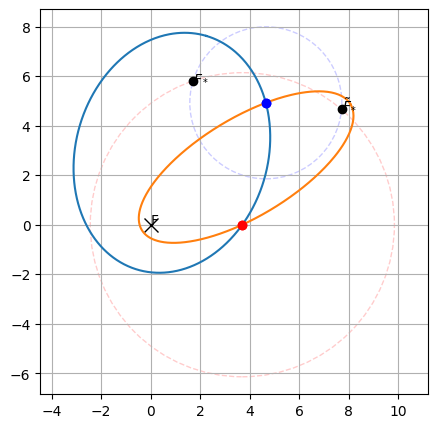

In [ ]:
r1,r2,ehats,ehatt,es,et,ps,pt,ws,wt,fig,ax = lambert_geometrico(P1,P2,af,plot=True)


##*Con $a_f$ es posible encontrar la velocidad de la partícula al inicio y final de la propagación*

Argumento del periapsis de los focos vacantes: -106.39524368040263 -148.8699094491726
Excentricidades de las elipses encontradas: 0.6153571509216309 0.9148154989160779
Semilatus recti de las elipses encontradas: 3.05734023151696 0.8026109269414492


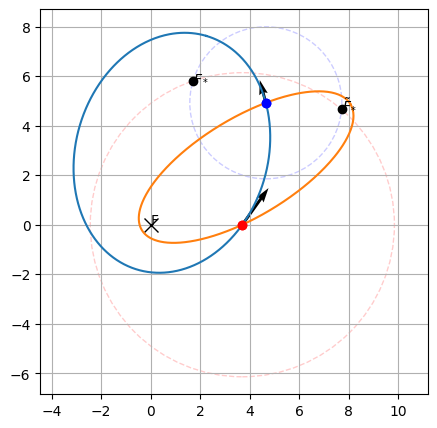

In [ ]:
v1,v2 = funcion_de_lambert(af,mu,tf,P1,P2,corto,True)

r1,r2,ehats,ehatt,es,et,ps,pt,ws,wt,fig,ax = lambert_geometrico(P1,P2,af,plot=True)

ax.quiver(P1[0],P1[1],v1[0],v1[1],scale=5)
ax.quiver(P2[0],P2[1],v2[0],v2[1],scale=5)

In [ ]:
print("velocidad al inicio:", v1)
print("velocidad al final:", v2)

velocidad al inicio: [3.37618897e-01 4.72574367e-01 6.57052398e-17]
velocidad al final: [-7.82404953e-02  2.93273861e-01 -1.10318168e-17]


##*La orbita hallada por Lambert corresponde al camino corto de la orbita de menor excentricidad*

In [ ]:
print("El semieje mayor es:", af*UL/1000 , "km" )
print("La excentricidad es:", es)
print("El semilatus recti es:", ps*UL/1000, "km")
print("El argumento del periapsis es:", ws*radianes)

El semieje mayor es: 16696.3141879618 km
La excentricidad es: 0.6153571509216309
El semilatus recti es: 10374.014006571773 km
El argumento del periapsis es: -106.39524368040263


##*Hallaremos ahora las velocidades de Lambert en el marco de referencia del observador. Las llamaremos  $v_{marte_1}, v_{marte_2}$*


##*Calculemos la matriz inversa para poder pasar del Frame de Lambert al Frame de Marte*

In [ ]:
M_inversa = M.T
M_inversa

array([[ 0.30783369, -0.94715342, -0.09021538],
       [ 0.89439719,  0.25573574,  0.3669508 ],
       [-0.32448741, -0.1936482 ,  0.92585544]])

##*Llevemos las velocidades de la maniobra al marco del observador*

In [ ]:
v1_marte = M_inversa@v1
v2_marte = M_inversa@v2

v1_marte, v2_marte , np.linalg.norm(v1_marte), np.linalg.norm(v2_marte)

print("Velocidad necesaria al inicio de la maniobra:", v1_marte , "Magnitud:" , np.linalg.norm(v1_marte), np.linalg.norm(v1_marte)*(UL/(1000*UT)) , "km/s")
print("Velocidad al final de la trayectoria:", v2_marte, "Magnitud:" , np.linalg.norm(v2_marte), np.linalg.norm(v2_marte)*(UL/(1000*UT)) , "km/s")


Velocidad necesaria al inicio de la maniobra: [-0.34366996  0.42281955 -0.20106626] Magnitud: 0.5807865804391179 2.059056835974581 km/s
Velocidad al final de la trayectoria: [-0.3018604   0.00502253 -0.0314039 ] Magnitud: 0.3035311064402745 1.0761057860087575 km/s


_____

##*Hallaremos ahora las velocidades iniciales y finales de la sonda, antes y despues de la maniobra*


In [ ]:
#Initial

h = np.sqrt(mu*p1)

xdot0 =  mu/h*(-np.cos(omega1)*np.sin(w1 + f1) - np.cos(i1)*np.sin(omega1)*np.cos(w1 + f1)) - mu*e1/h*(np.cos(omega1)*np.sin(w1) + np.cos(w1)*np.cos(i1)*np.sin(omega1))
ydot0 =  mu/h*(-np.sin(omega1)*np.sin(w1 + f1) + np.cos(i1)*np.cos(omega1)*np.cos(w1 + f1)) + mu*e1/h*(-np.sin(omega1)*np.sin(w1) + np.cos(w1)*np.cos(i1)*np.cos(omega1))
zdot0 =  mu/h*(np.sin(i1)*np.cos(w1 + f1) + e1*np.cos(w1)*np.sin(i1))

v01 = np.array([xdot0, ydot0, zdot0])

print("Velocidad inicial de la sonda:", v01 , "Magnitud:" , np.linalg.norm(v01), np.linalg.norm(v01)*(UL/(1000*UT)) , "km/s")

Velocidad inicial de la sonda: [-0.46366176  0.20277228  0.1190439 ] Magnitud: 0.5198752449100364 1.84310848931225 km/s


In [ ]:
#Final

h1 = np.sqrt(mu*p2)

xdotf =  mu/h1*(-np.cos(omega2)*np.sin(w2 + f2) - np.cos(i2)*np.sin(omega2)*np.cos(w2 + f2)) - mu*e2/h1*(np.cos(omega2)*np.sin(w2) + np.cos(w2)*np.cos(i2)*np.sin(omega2))
ydotf =  mu/h1*(-np.sin(omega2)*np.sin(w2 + f2) + np.cos(i2)*np.cos(omega2)*np.cos(w2 + f2)) + mu*e2/h1*(-np.sin(omega2)*np.sin(w2) + np.cos(w2)*np.cos(i2)*np.cos(omega2))
zdotf =  mu/h1*(np.sin(i2)*np.cos(w2 + f2) + e2*np.cos(w2)*np.sin(i2))

v0f = np.array([xdotf, ydotf, zdotf])

print("Velocidad final de la sonda:", v0f , "Magnitud:" , np.linalg.norm(v0f), np.linalg.norm(v0f)*(UL/(1000*UT)) , "km/s")

Velocidad final de la sonda: [-0.15175449 -0.07506536  0.2086263 ] Magnitud: 0.26868042082351484 0.9525499999860597 km/s


##*Calculemos el cambio que debe sufrir la velocidad de la sonda al inicio y al final de la maniobra $\Delta v$*

In [ ]:
#vectores

delta_v0_vector = v1_marte - v01

delta_vf_vector = v2_marte - v0f

print("la diferencia entre la velocidad inicial requerida y la actual es:", delta_v0_vector, "Magnitud:" , np.linalg.norm(delta_v0_vector) , np.linalg.norm(delta_v0_vector)*(UL/(1000*UT)) , "km/s")
print("la diferencia entre la velocidad final requerida y la actual es:", delta_vf_vector, "Magnitud:" , np.linalg.norm(delta_vf_vector),  np.linalg.norm(delta_vf_vector)*(UL/(1000*UT)) , "km/s")

la diferencia entre la velocidad inicial requerida y la actual es: [ 0.1199918   0.22004727 -0.32011016] Magnitud: 0.4065579264403862 1.441365737176294 km/s
la diferencia entre la velocidad final requerida y la actual es: [-0.15010591  0.08008789 -0.2400302 ] Magnitud: 0.29421140782828986 1.043064752034245 km/s


##*Grafica de la maniobra*

##*Para esto solo necesitamos pasar la órbita que hallamos por Lambert al sistema de referencia de Marte*

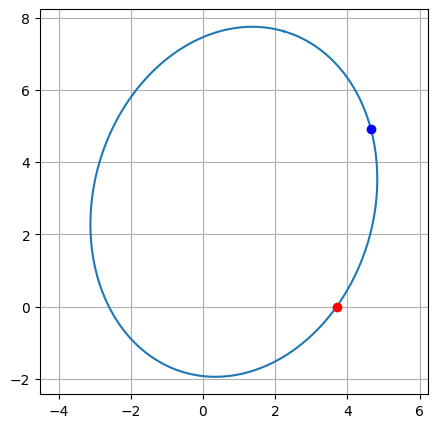

In [ ]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111)
xt_lambert, yt_lambert, zt_lambert = dibuja_conica_datos(ax,es,ps,ws*radianes)
ax.grid()
ax.axis('equal');
ax.plot(P1[0],P1[1],'ro')
ax.plot(P2[0],P2[1],'bo')

##*Multipliquemos la trayectoria en Lambert por la matriz inversa y extraigamos las nuevas posiciones en coordenadas de Marte*

In [ ]:
transfer_lambert = np.array([xt_lambert,yt_lambert,zt_lambert])
transfer_marte = [M_inversa@transfer_lambert[:,a] for a, i in enumerate(range(len(xt_lambert)))]

xt_marte = [ transfer_marte[a][0] for a, i in enumerate(range(len(xt_lambert)))]
yt_marte = [ transfer_marte[a][1] for a, i in enumerate(range(len(yt_lambert)))]
zt_marte = [ transfer_marte[a][2] for a, i in enumerate(range(len(zt_lambert)))]


##*Grafica con la órbita de transferencia*

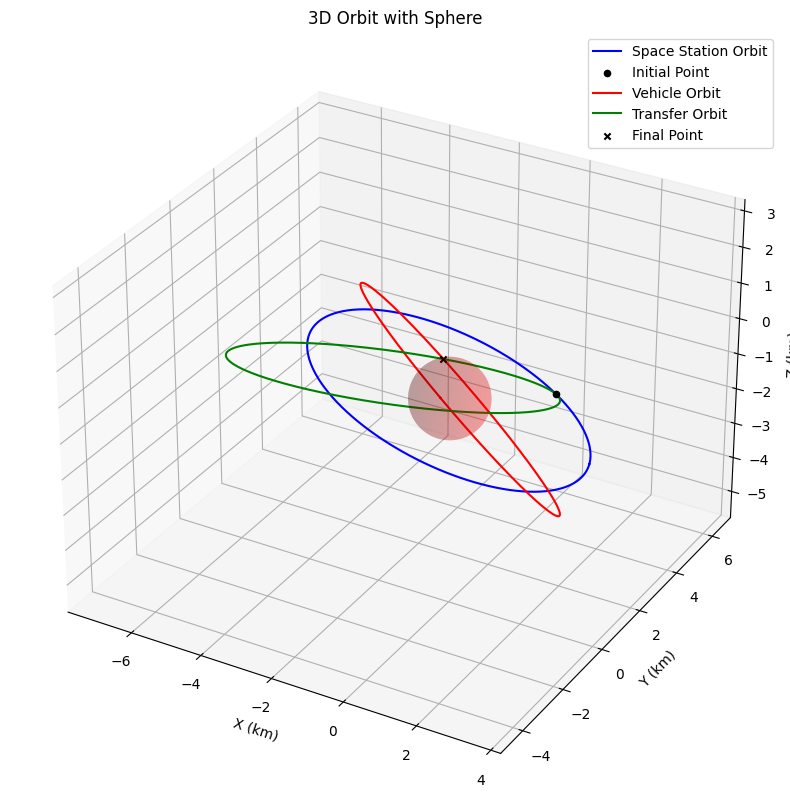

In [ ]:
fig = plt.figure( figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
pc.dibuja_esfera(ax, centro=(0,0,0), radio=1, color='r', alpha=0.2)

# Add the orbit points
ax.plot(xppp1, yppp1, zppp1, label='Space Station Orbit', color='b')

ax.scatter(xinit, yinit, zinit, label='Initial Point', color='k')

ax.plot(xppp2, yppp2, zppp2, label='Vehicle Orbit', color='r')

ax.plot(xt_marte, yt_marte, zt_marte, label='Transfer Orbit', color='g')

ax.scatter(xfinal, yfinal, zfinal, label='Final Point', color='k', marker = "x")

# Set axis labels

ax.set_xlabel('X (km)')
ax.set_ylabel('Y (km)')
ax.set_zlabel('Z (km)')
ax.set_title('3D Orbit with Sphere')

ax.legend()

ax.axis('equal');

##*Más vistas*

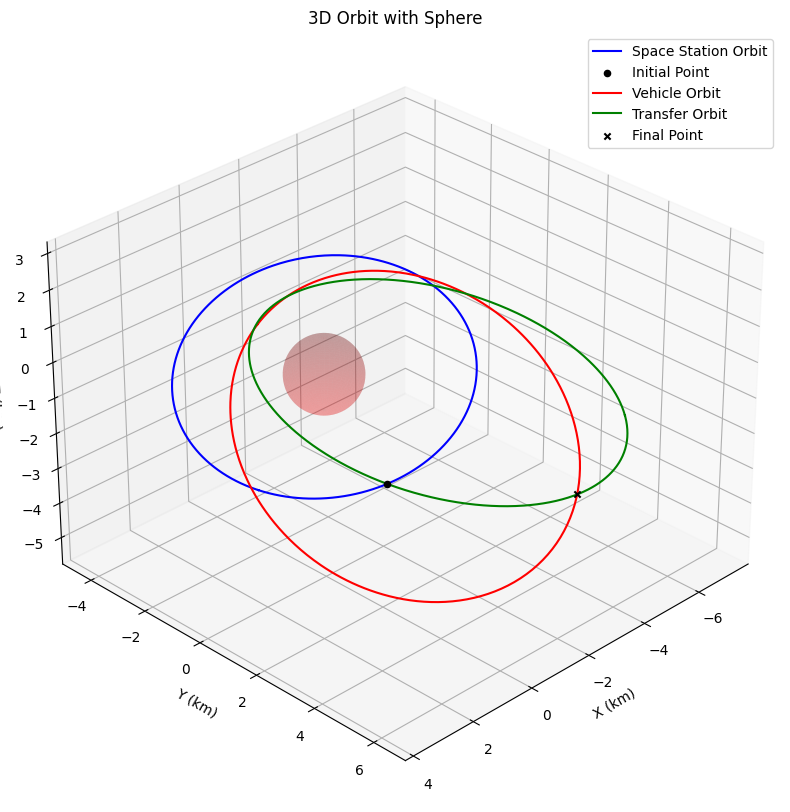

In [ ]:
fig = plt.figure( figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
pc.dibuja_esfera(ax, centro=(0,0,0), radio=1, color='r', alpha=0.2)

# Add the orbit points
ax.plot(xppp1, yppp1, zppp1, label='Space Station Orbit', color='b')

ax.scatter(xinit, yinit, zinit, label='Initial Point', color='k')

ax.plot(xppp2, yppp2, zppp2, label='Vehicle Orbit', color='r')

ax.plot(xt_marte, yt_marte, zt_marte, label='Transfer Orbit', color='g')

ax.scatter(xfinal, yfinal, zfinal, label='Final Point', color='k', marker = "x")

# Set axis labels

ax.set_xlabel('X (km)')
ax.set_ylabel('Y (km)')
ax.set_zlabel('Z (km)')
ax.set_title('3D Orbit with Sphere')

ax.view_init(elev=30, azim=45)

ax.legend()

ax.axis('equal');

##*Otra vista*

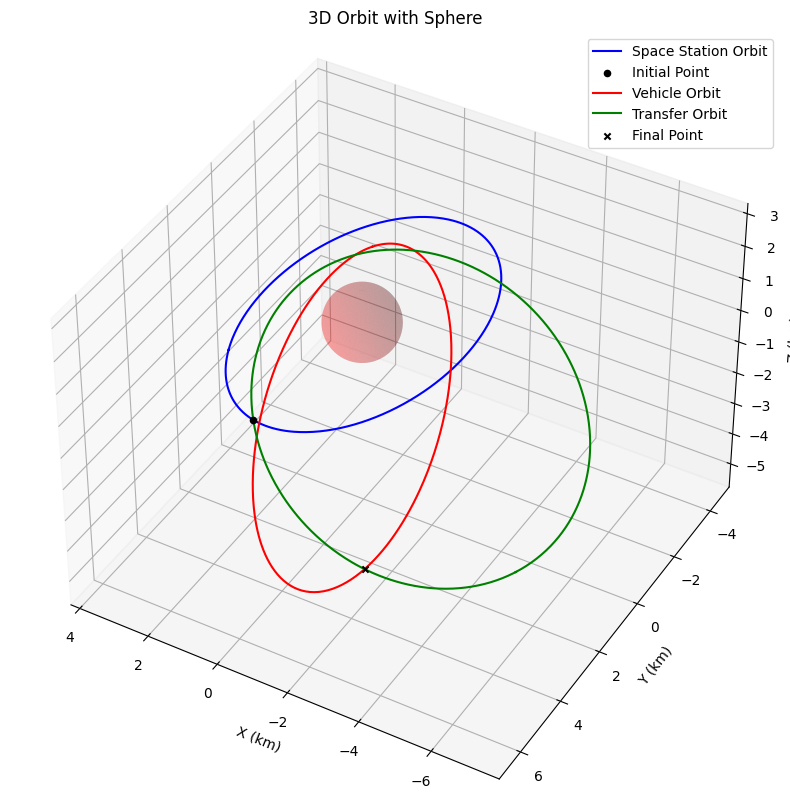

In [ ]:
fig = plt.figure( figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
pc.dibuja_esfera(ax, centro=(0,0,0), radio=1, color='r', alpha=0.2)

# Add the orbit points
ax.plot(xppp1, yppp1, zppp1, label='Space Station Orbit', color='b')

ax.scatter(xinit, yinit, zinit, label='Initial Point', color='k')

ax.plot(xppp2, yppp2, zppp2, label='Vehicle Orbit', color='r')

ax.plot(xt_marte, yt_marte, zt_marte, label='Transfer Orbit', color='g')

ax.scatter(xfinal, yfinal, zfinal, label='Final Point', color='k', marker = "x")

# Set axis labels

ax.set_xlabel('X (km)')
ax.set_ylabel('Y (km)')
ax.set_zlabel('Z (km)')
ax.set_title('3D Orbit with Sphere')

ax.view_init(elev=40, azim=120)

ax.legend()

ax.axis('equal');